In [60]:
import pandas as pd
import csv
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import geopandas as gpd
import folium
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
df = pd.read_csv('pizza_hut_locations.csv', usecols =['type', 'address_1','open_hours', 'city', 'state', 'latitude', 'longitude'])

df= df.dropna()

df

In [ ]:
df.describe()

In [ ]:
df.mode()

In [61]:
Pizza_map = folium.Map(location = [-37.84970, 144.96800], zoom_start = 2)

Pizza_map 

In [62]:
Pizza_shop = df.loc[5679]
folium.Marker(
        location = [Pizza_shop['latitude'], Pizza_shop['longitude']]
).add_to(Pizza_map)

Pizza_map

In [63]:
for _, Pizza_shop in df.iterrows():
    folium.Marker(
        location = [Pizza_shop['latitude'], Pizza_shop['longitude']],
        popup = Pizza_shop['address_1']
    ).add_to(Pizza_map)
    
Pizza_map

<AxesSubplot:>

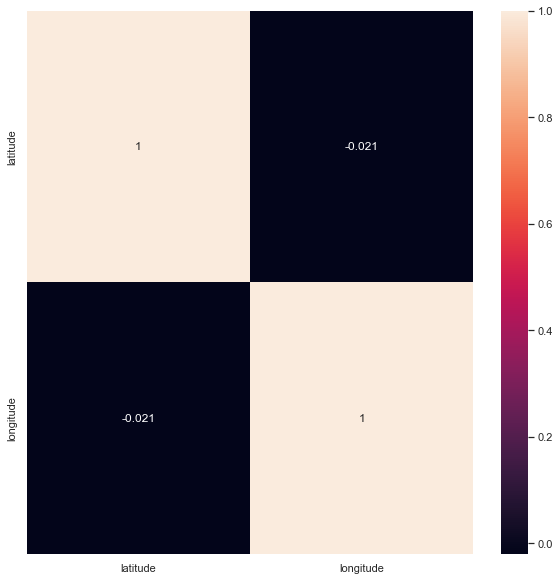

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

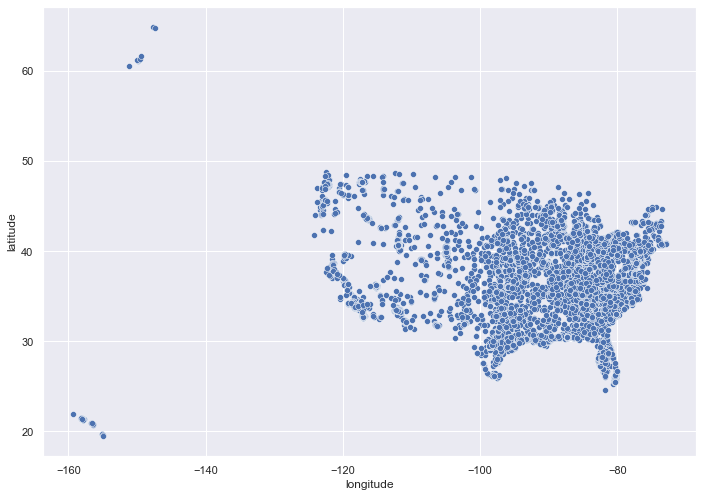

In [65]:
#mapping
cmap = sns.color_palette('rocket',as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df, x="longitude", y="latitude", palette = cmap,  
                sizes=(20, 200))

plt.show()

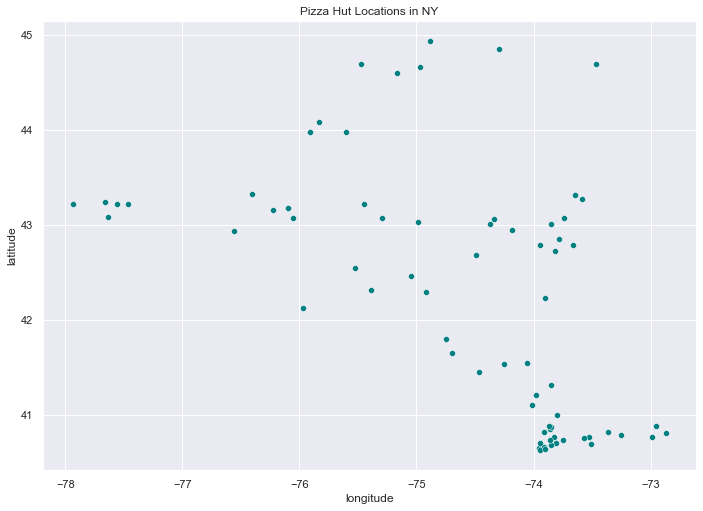

In [66]:
cmap = sns.color_palette('rocket',as_cmap=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df[df['state']=='NY'], x="longitude", y="latitude", palette = cmap,  
                sizes=(20, 200), color = ['teal'])
plt.title('Pizza Hut Locations in NY')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.show()

No handles with labels found to put in legend.


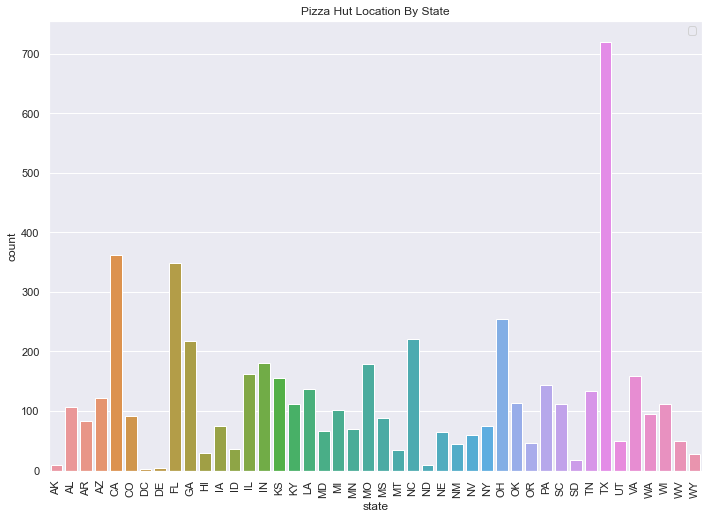

In [67]:
state_plot = sns.countplot(data = df , x = "state")
state_plot.set_xticklabels(state_plot.get_xticklabels(), rotation=90)
plt.title("Pizza Hut Location By State")
plt.legend()

px.histogram(df, x='state',title='Frequency of restaurants type')
fig = px.pie(df, names='state', title = 'Population of restaurants type')
fig.show()

In [70]:
topcities = df['city'].value_counts()

topcities

Houston               63
San Antonio           45
Las Vegas             34
Dallas                29
Miami                 27
                      ..
South Haven            1
Schoolcraft            1
Sault Sainte Marie     1
Yorba Linda            1
Worland                1
Name: city, Length: 2862, dtype: int64

No handles with labels found to put in legend.


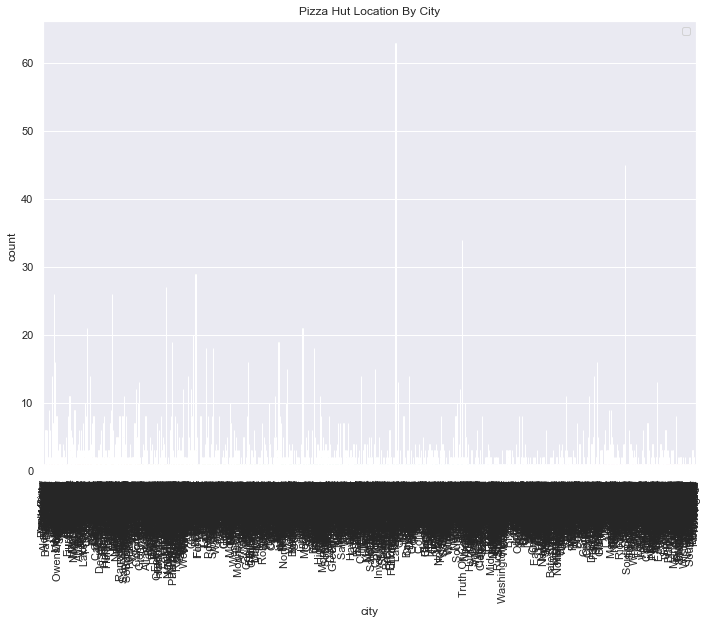

In [71]:
city_plot = sns.countplot(data = df , x = "city")
city_plot.set_xticklabels(city_plot.get_xticklabels(), rotation=90)
plt.title("Pizza Hut Location By City")
plt.legend()